In [ ]:
!pip install face_recognition
!pip install opencv-python

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=285b4fc7a9108b1f62a3816c1d50dec90254f3685b6b1ca29be53039b8de0af6
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


Importing all the required libraries

In [ ]:
import face_recognition   ##Detecting and recogniting faces
import cv2     ## intracting with images
import os       ## For Reading the file name 
from google.colab.patches import cv2_imshow

In [ ]:
!mkdir known
!wget 'https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg' -O known/elon.jpg
!wget 'https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg' -O known/bill.jpg

!mkdir unknown
!wget 'https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg' -O unknown/2.jpg
!wget 'https://api.time.com/wp-content/uploads/2019/04/mark-zuckerberg-time-100-2019.jpg?quality=85&zoom=2' -O unknown/3.jpg

--2021-03-14 09:09:13--  https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239507 (234K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 233.89K  --.-KB/s    in 0.08s   

2021-03-14 09:09:13 (2.94 MB/s) - ‘known/elon.jpg’ saved [239507/239507]

--2021-03-14 09:09:13--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 72.21.91.70, 2600:1480:2000:e5::
Connecting to pbs.twimg.com (pbs.twimg.com)|72.21.91.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23065 (23K) [image/jpeg]
Saving to: ‘known/bill.jpg’

known/bill.jpg      100%[===================>]  22.52K  --.-KB/s    in 0s      

20

Now We will create a function that can be used to read and reshape the images. It only takes the file path as an input.

In [ ]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

The Face_recognition library recognizes faces by generating different-different encodings for each known face and unknown face and then both the encodings get compared and whichever encoding is matched it shows the label name as output.

Preparing encodings for Known Faces

In [ ]:
known_encodings = [] 
known_names = []
known_dir = 'known' ##Known directory path
substring = 'ipynb'
for file in os.listdir(known_dir):
  if substring in file:
    continue
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings  
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])
  print(known_names) ## Printing all the known labels

['bill']
['bill', 'elon']


The next and the final step is to prepare encodings for unknown faces, comparing them with known encoding. Drawing a rectangle on the unknown faces with the known name

Processing 2.jpg
[True, False]


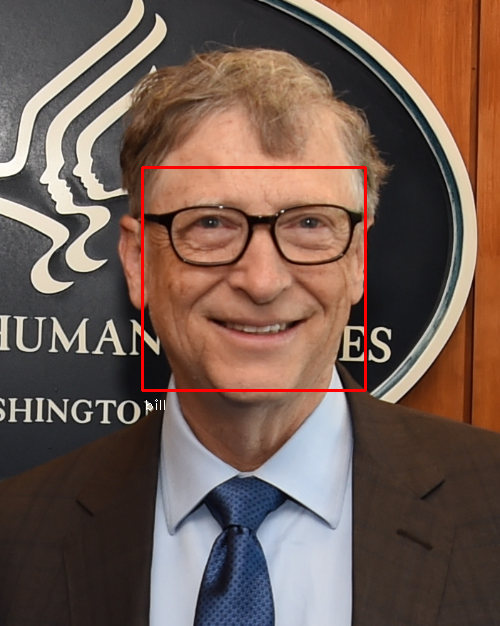

Processing 3.jpg
[False, False]


In [ ]:
unknown_dir = 'unknown' ##UNknown Images Directory
for file in os.listdir(unknown_dir): 
  print("Processing",file) 
  if file.endswith(".jpg"):
    img = read_img(unknown_dir + '/' + file)##reading images 
    img_enc = face_recognition.face_encodings(img)[0]##Encodings 
    results = face_recognition.compare_faces(known_encodings,img_enc)
  #for i in range(len(results)):
    #if results[i]:
      #print(known_names[i])
    print(results)
    for i in range(len(results)):
      if results[i]:
        name = known_names[i]
        (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left,top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255),1)
        cv2_imshow(img)
